In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
# Paths to dataset
data_dir = "/content/drive/MyDrive/DATASET DYSGRAPHIA HANDWRITING/"  # replace with the actual path to your dataset

In [4]:
# Image dimensions
img_height, img_width = 150, 150
batch_size = 32

# Create Image Data Generators for loading images
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale pixel values from [0, 255] to [0, 1]
    validation_split=0.2  # Use 20% of data for validation
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 200 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


In [5]:
# Build the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Binary output

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:

# Train the model
epochs = 20
history = model.fit(
    train_gen,
    # steps_per_epoch=train_gen.samples // batch_size,
    validation_data=val_gen,
    # validation_steps=val_gen.samples // batch_size,
    epochs=epochs,
    verbose = 1
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5784 - loss: 1.0575 - val_accuracy: 0.5510 - val_loss: 0.6669
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 77ms/step - accuracy: 0.6194 - loss: 0.6686 - val_accuracy: 0.7347 - val_loss: 0.6145
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.7305 - loss: 0.5637 - val_accuracy: 0.7959 - val_loss: 0.4932
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.8170 - loss: 0.4357 - val_accuracy: 0.7959 - val_loss: 0.4348
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.8600 - loss: 0.3127 - val_accuracy: 0.8163 - val_loss: 0.5005
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.8723 - loss: 0.3131 - val_accuracy: 0.7959 - val_loss: 0.3361
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9374 - loss: 0.2129 - val_accuracy: 0.8163 - val_loss: 0.3233
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9475 - loss: 0.1470 - val_accuracy: 0.7755 - val_loss: 0.3803
Epoch 9/20


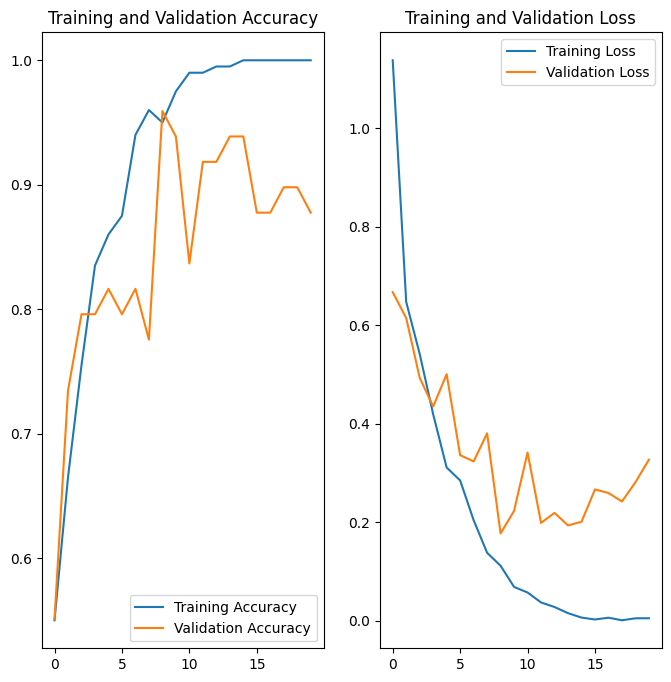

In [8]:
# Plot the training history (accuracy and loss)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
# Save the trained model
model.save("dysgraphia_classification_model.h5")

In [10]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("dysgraphia_classification_model.h5")

# Print the model summary to confirm it was loaded correctly
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,483 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess a new image
img_path = "/content/drive/MyDrive/DATASET DYSGRAPHIA HANDWRITING/Potential Dysgraphia/PD (10).jpg"  # Replace with the actual image path
img = image.load_img(img_path, target_size=(150, 150))  # Ensure size matches model input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

# Make a prediction
prediction = loaded_model.predict(img_array)

# Output result
if prediction[0] > 0.5:
    print("Prediction: Dysgraphic handwriting")
else:
    print("Prediction: Non-dysgraphic handwriting")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction: Dysgraphic handwriting
